# <font color='saddlebrown'>Explanatory Data Analysis</font>

***
***

### <font color='saddlebrown'>Import packages</font>

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#for easy access to path
import os
import sys

#importing packages for data manuplation and visualization
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew

import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew


# Visualization df
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

sys.path.append(os.path.abspath(os.path.join('../data')))

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
df = pd.read_csv("../data/clean_data.csv")

In [4]:
import plots  as plot

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The mean, standard error and "worst" or largest of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.All feature values are recoded with four significant digits.

*** 
                                    The following are data descriptions.
***

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- ID number
- Diagnosis(M=malignant, B=benign)
- radius(mean of distances from center to points on the perimeter)
- texture(standard deviation of gray - scale values)
- perimeter
- area
- smoothness(local variation in radius lengths)
- compactness $(perimeter^2 / area - 1.0)$
- concavity(severity of concave portions of the contour)
- concave points(number of concave portions of the contour)
- symmetry
- fractal dimension("coastline approximation" - 1)

In [5]:
# unique value counts
counts_df = df['diagnosis'].value_counts()
counts_df

B    357
M    212
Name: diagnosis, dtype: int64

> `357` were Benign while `212` were Malignan.


### <font color='saddlebrown'>Univariate Analysis</font>

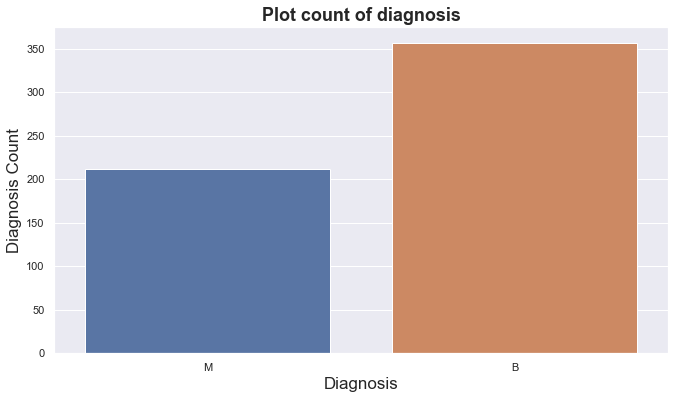

<Figure size 432x288 with 0 Axes>

In [6]:
plot.plot_count(df, 'diagnosis', "Diagnosis", "Diagnosis Count")
plt.savefig('../screenshots/DiagnosisCount.png')

### <font color='saddlebrown'>Bivariate Analysis</font>

In [13]:
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
plot.boxplot(df,columns,fields)

In [8]:
y = df.diagnosis # M or B
x = df.drop(['id', 'diagnosis'], axis=1)

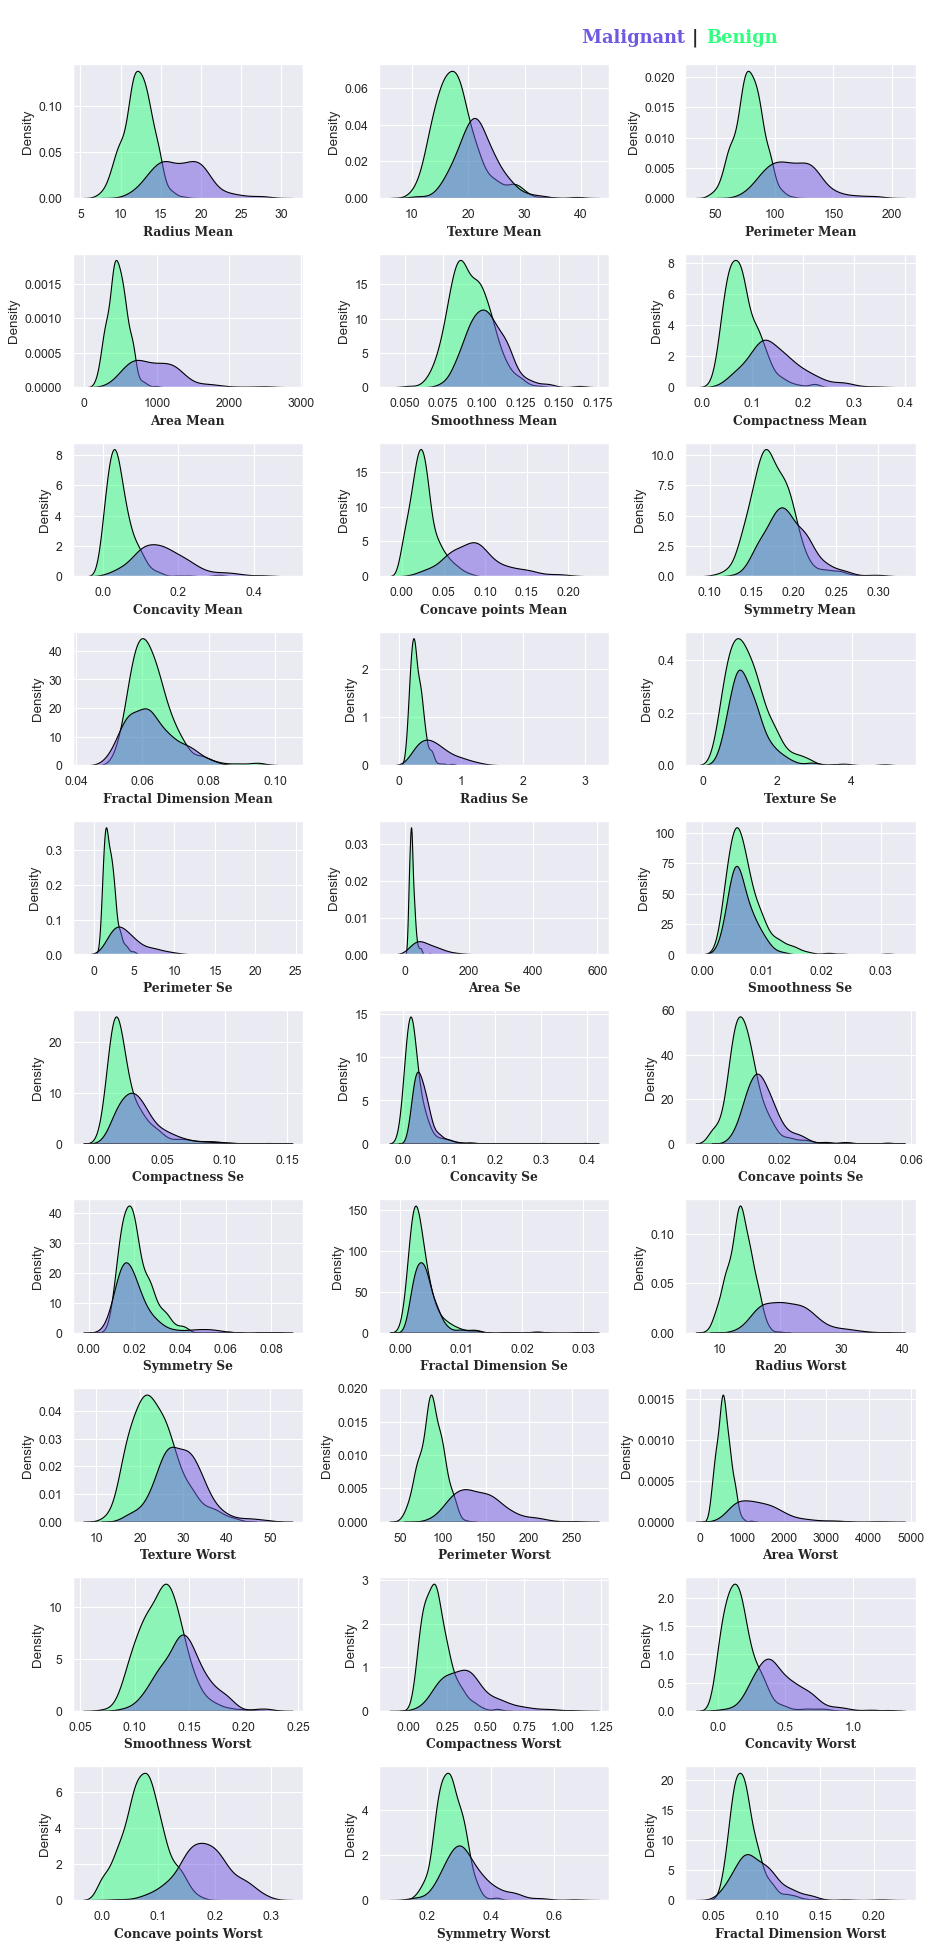

In [10]:
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # plots
    sns.kdeplot(df[col], ax = ax, shade = True ,
                palette=["#7158e2", "#32ff7e"],
                alpha = 0.5, linewidth = 1, ec = 'black',
                hue = df['diagnosis'], hue_order = ['M','B'],
                legend = False)

    # plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':11, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 2,h_pad = 1, w_pad = 1)

fig.text(0.615,1, "\n Malignant",{'font':'serif','size':16, 'weight':'bold', 'color':"#7158e2"}, alpha = 1)
fig.text(0.735,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.75,1, "Benign",{'font':'serif','size':16, 'weight':'bold','color':"#32ff7e"}, alpha = 1)

fig.show()

plt.savefig('../screenshots/Bivariet.png')

In [11]:
def hist_plot(df,features, fields):
    fig, axs = plt.subplots(10,3, figsize=(20,45))
    for col in range(len(features)):  
        for f in range(len(fields)):  
            sns.histplot(df, 
                        x=features[col]+"_"+fields[f], 
                        hue="diagnosis", element="bars", 
                        stat="count", 
                        palette=["dodgerblue", "limegreen"],
                        ax=axs[col][f])

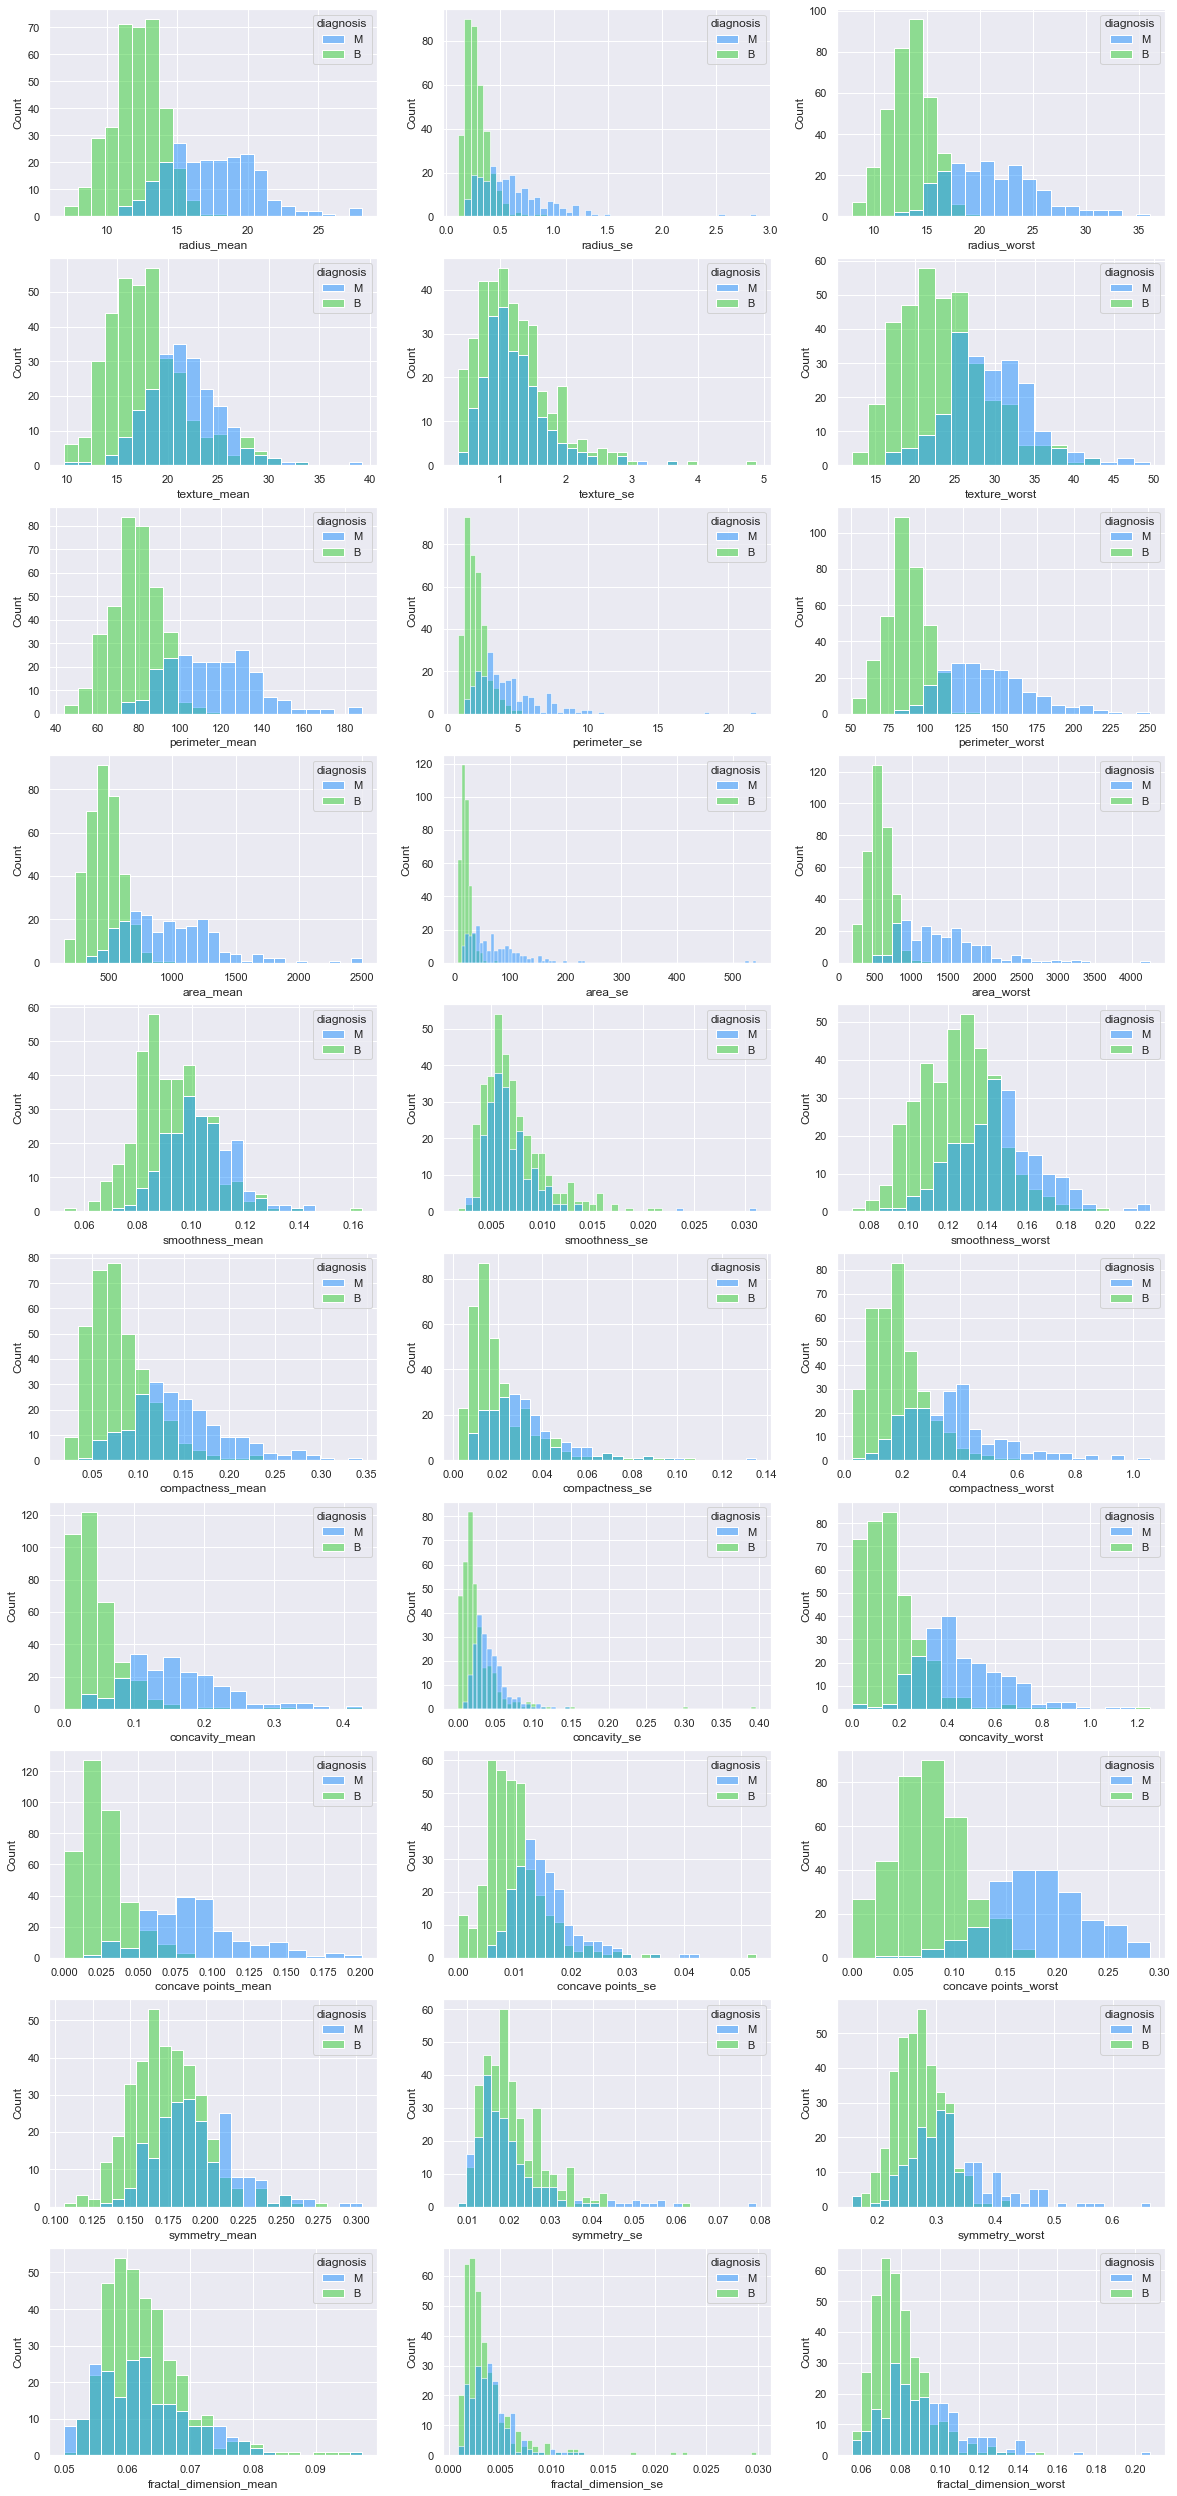

In [12]:
hist_plot(df,columns,fields)
plt.savefig('../screenshots/hist.png')

In [15]:
mean_df = x.iloc[:, 0:10]
se_df = x.iloc[:, 10:20]
worst_df = x.iloc[:, 20:30]

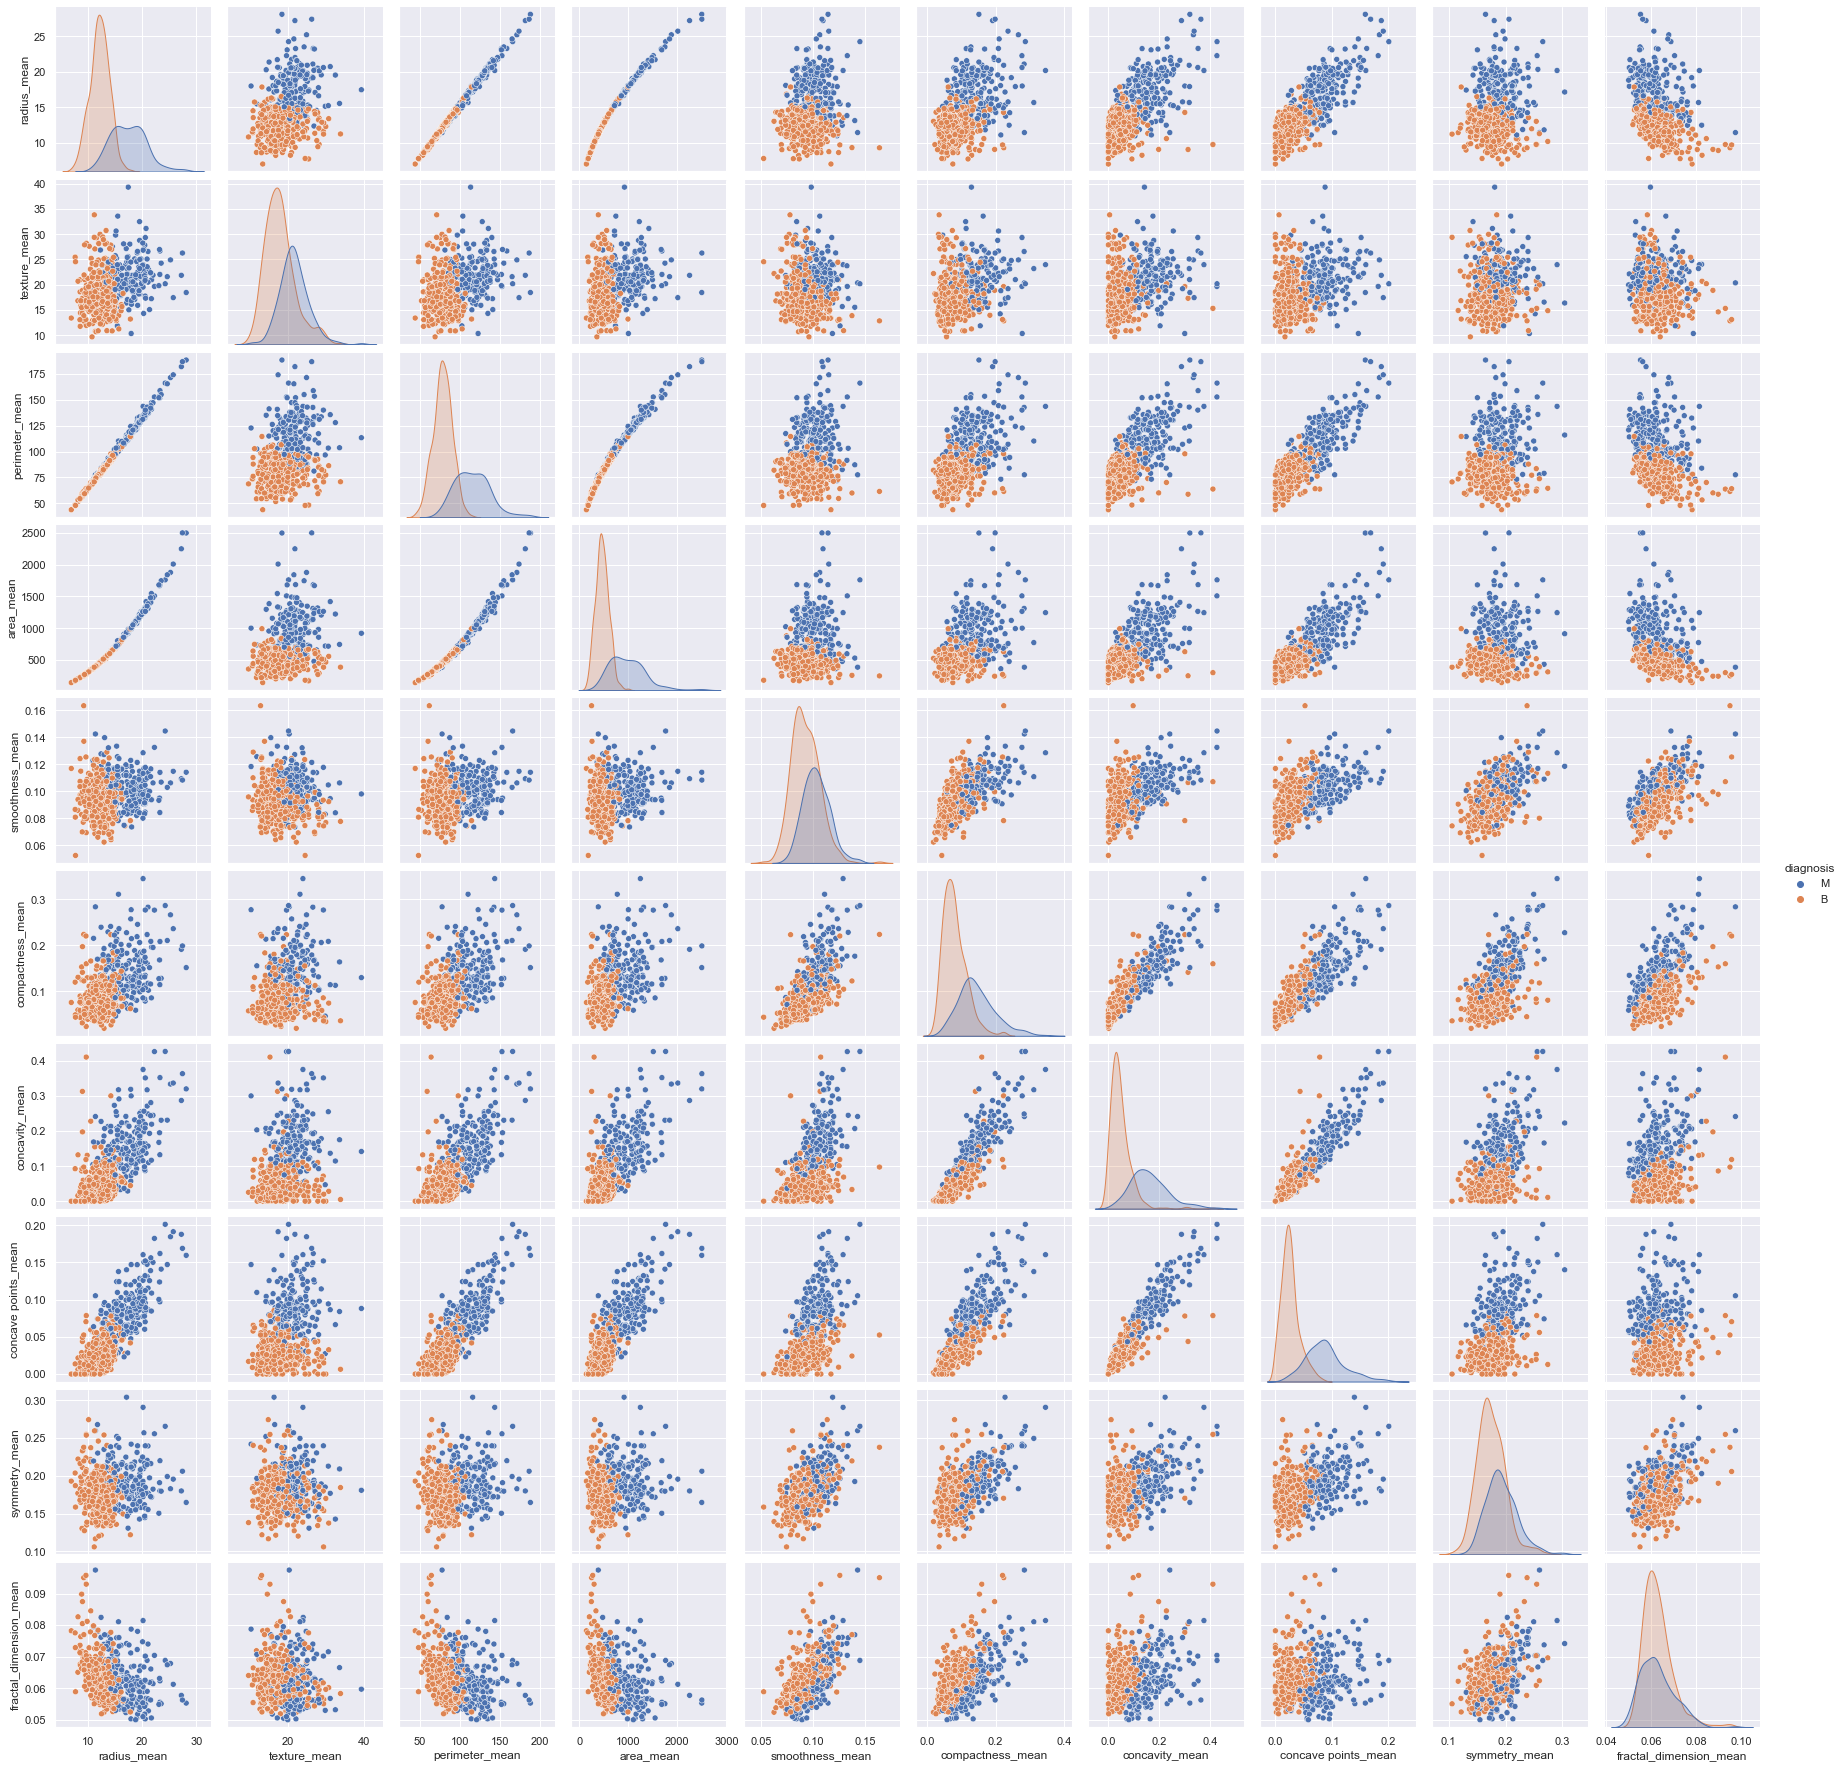

<Figure size 432x288 with 0 Axes>

In [18]:
mean_df_dia = mean_df.copy()
mean_df_dia['diagnosis'] = y
sns.pairplot(mean_df_dia, hue="diagnosis")
plt.show()
plt.savefig('../screenshots/mean_data_diagnosis.png')

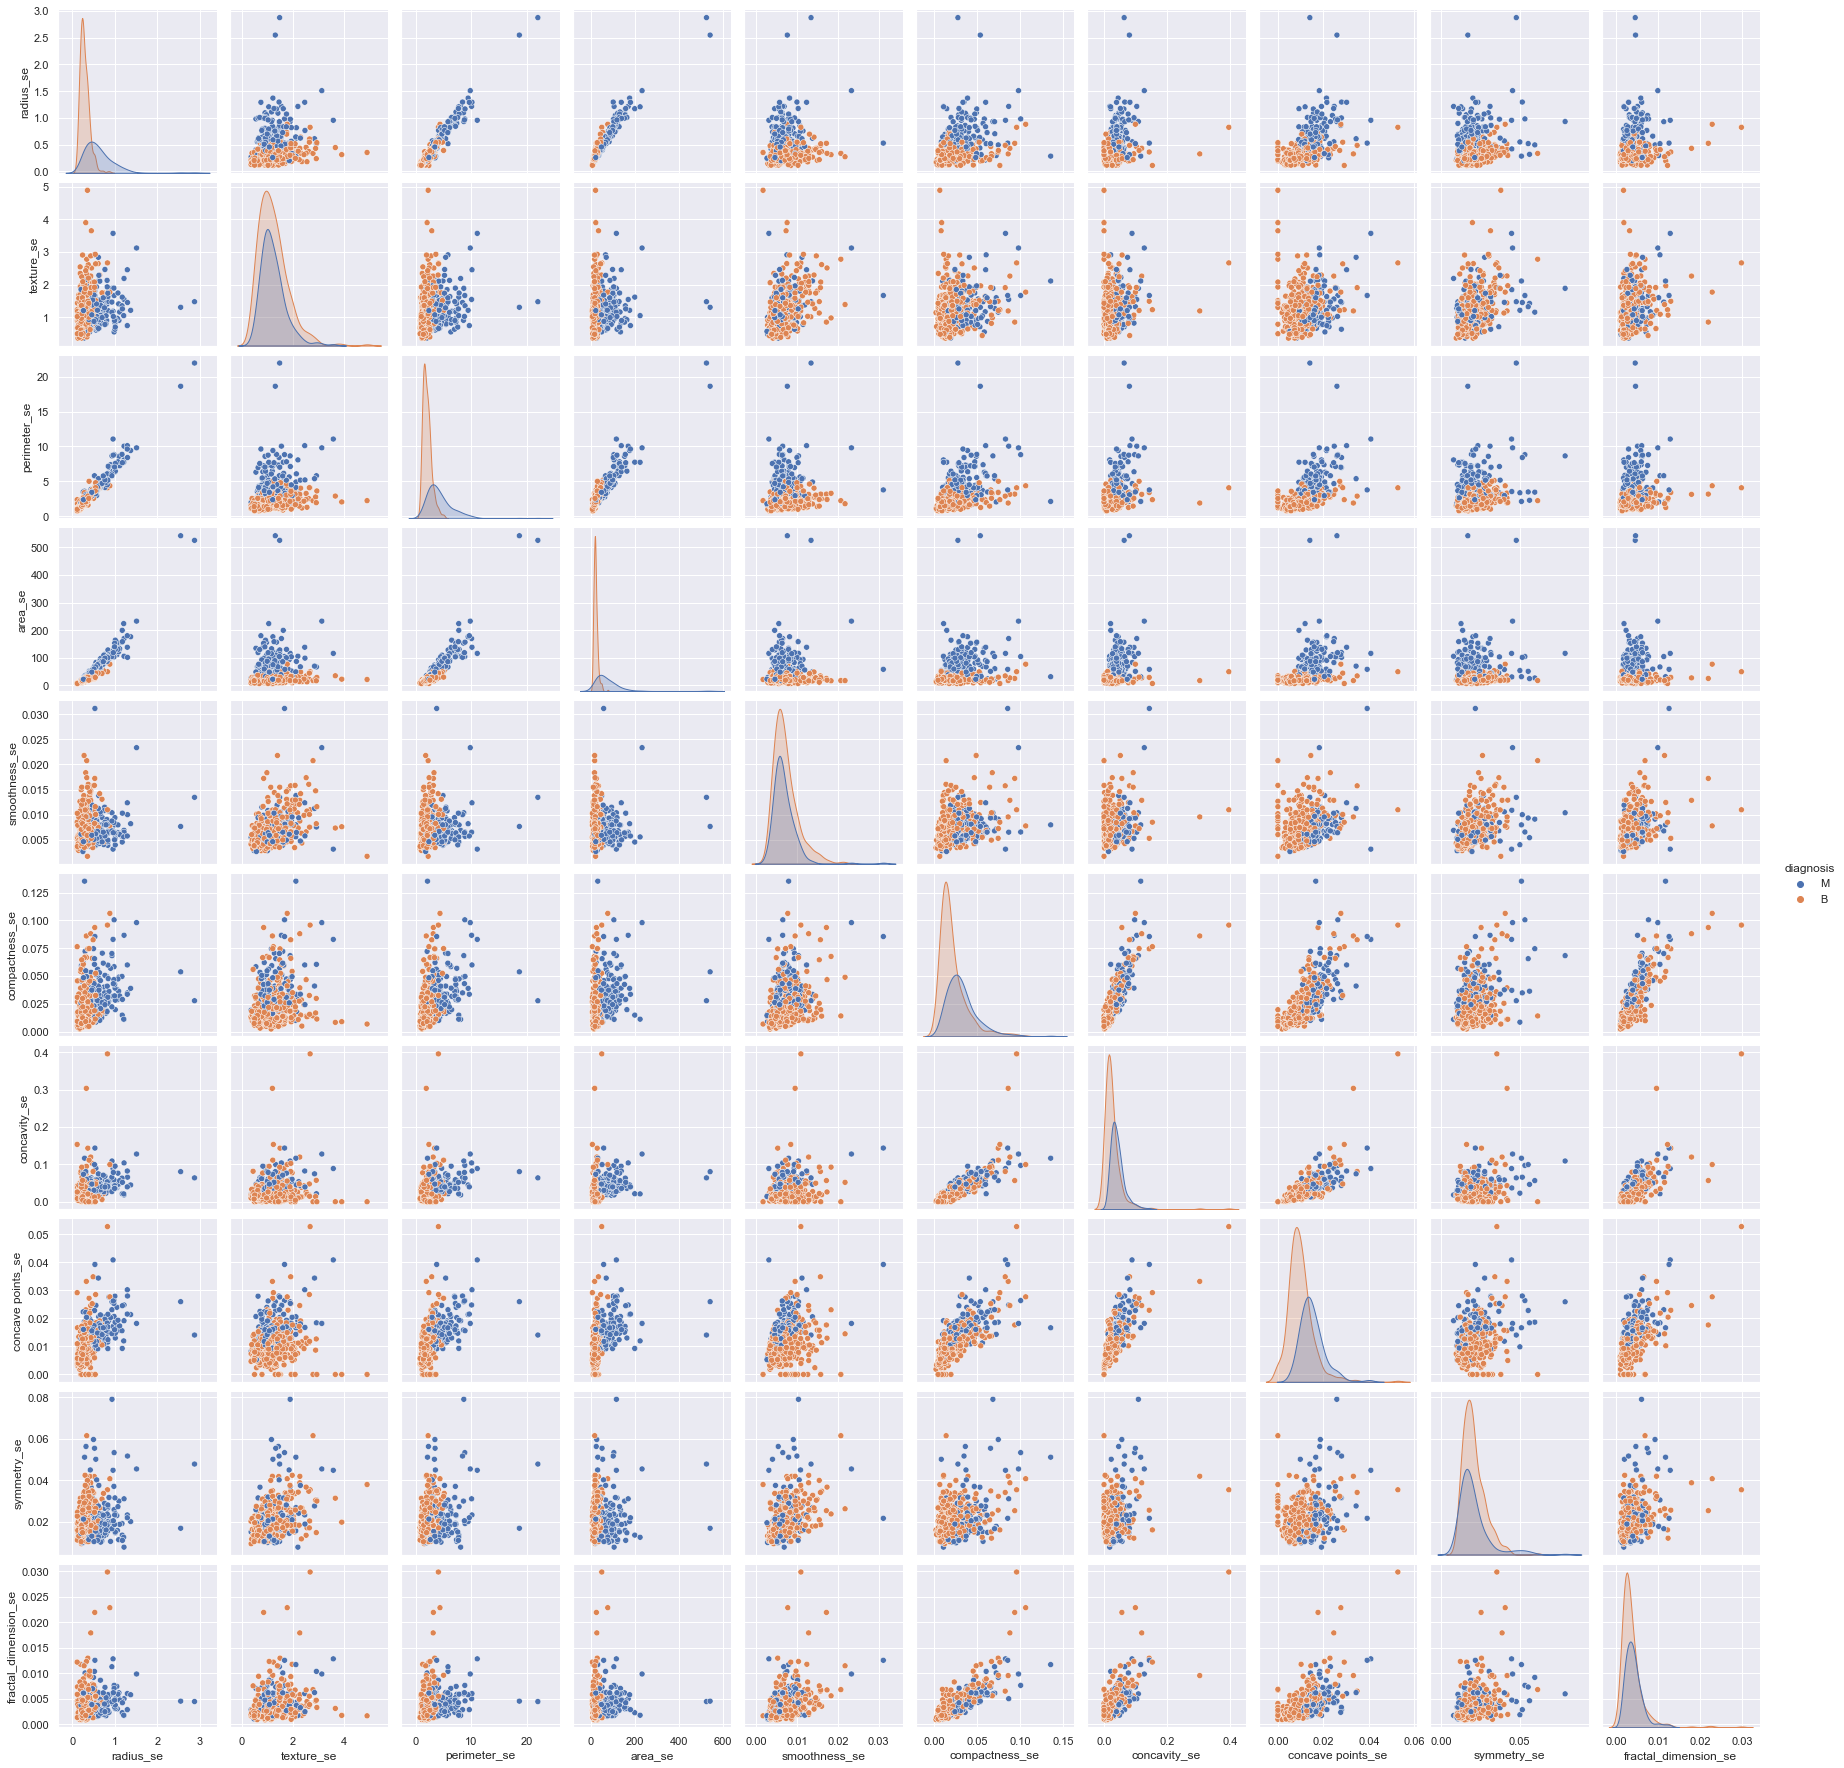

<Figure size 432x288 with 0 Axes>

In [19]:
se_df_dia = se_df.copy()
se_df_dia['diagnosis'] = y
sns.pairplot(se_df_dia, hue="diagnosis")
plt.show()
plt.savefig('../screenshots/se_df_diagnosis.png')

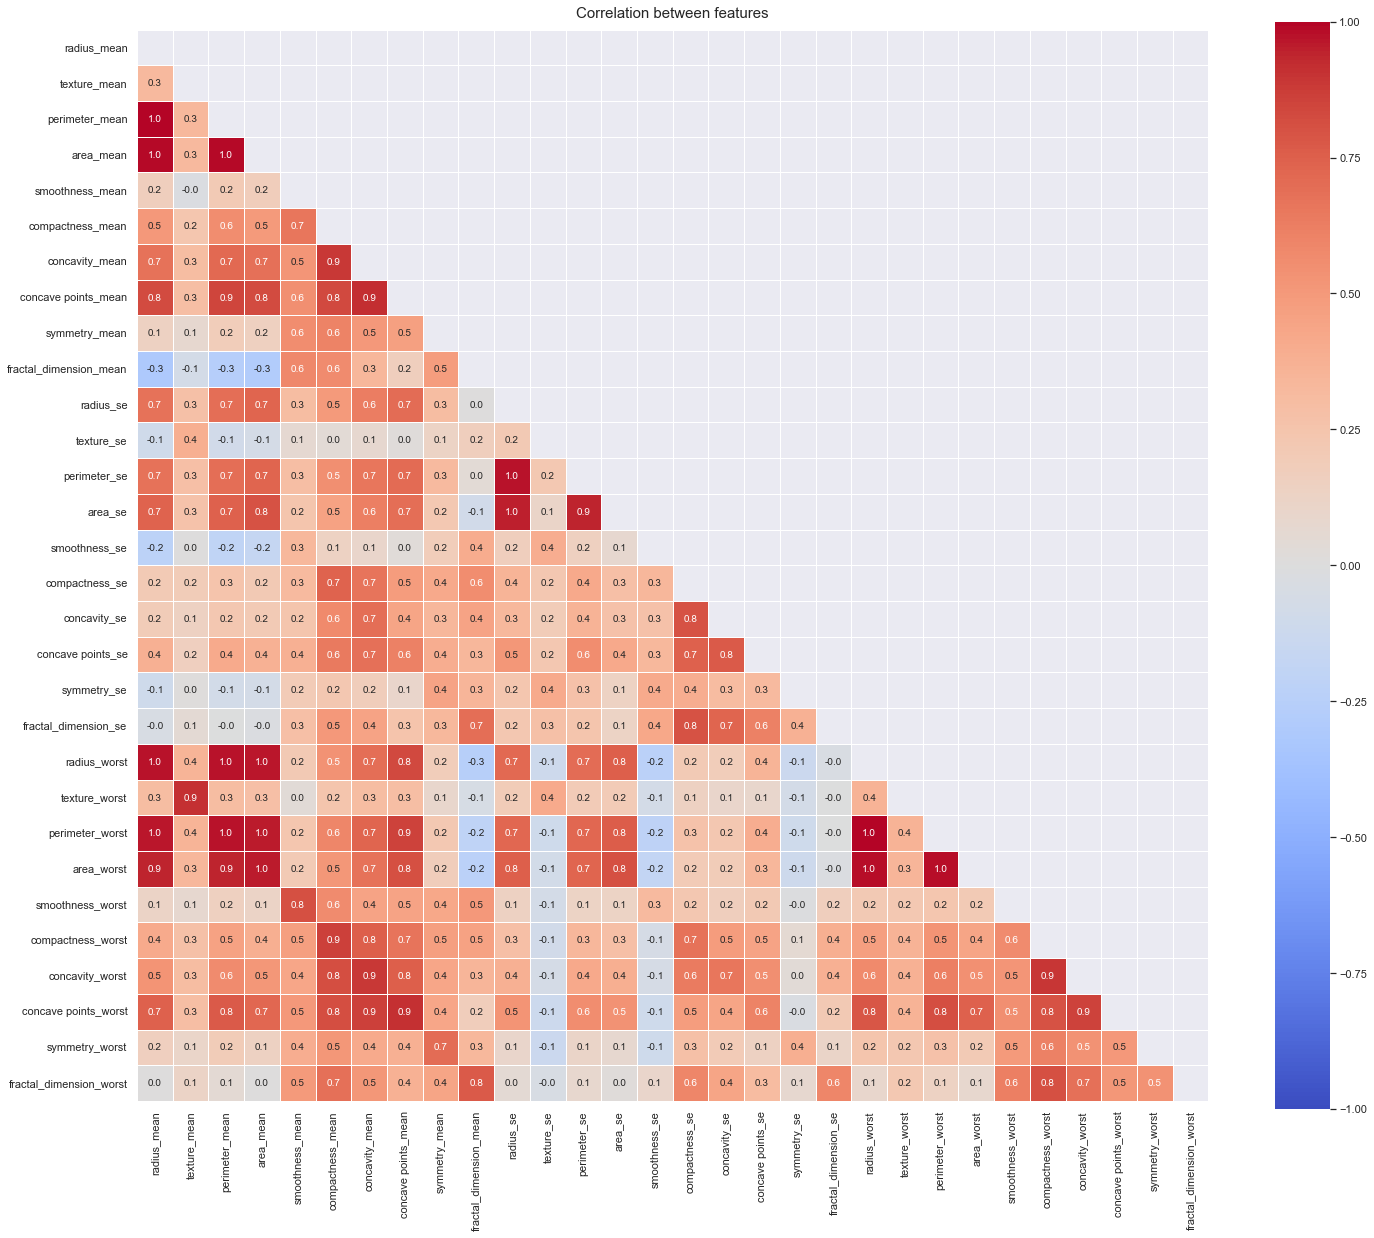

In [21]:
plot.plot_correlation(x)
plt.savefig('../screenshots/correlation.png')